In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch

# Data Loader

In [18]:
import torchvision
transforms = torchvision.transforms

In [19]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5)
    )
])

In [20]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True, num_workers=4)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Sample data

In [22]:
import matplotlib.pyplot as plt
import numpy as np

train_loader_it = iter(train_loader)
images, labels = train_loader_it.next()

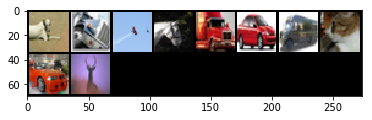

In [23]:
img = images / 2 + 0.5
plt.imshow(np.transpose(torchvision.utils.make_grid(img).numpy(), (1, 2, 0)))

In [24]:
# Actually 'vanila' and 'alex' are lie since it uses 3 channels of input and uses Adam update.. and some of parameters have changed!
from vanilla_alexnet.alex import AlexNet

net = AlexNet()
Variable = torch.autograd.Variable
for _ in range(10):
    for i, (images, labels) in enumerate(train_loader):
        loss = net.step(Variable(images), Variable(labels))
        if i % 5000 == 0:
            print(loss)
    

Variable containing:
 2.2971
[torch.FloatTensor of size 1]

Variable containing:
 1.0835
[torch.FloatTensor of size 1]

Variable containing:
 1.0249
[torch.FloatTensor of size 1]

Variable containing:
 0.7491
[torch.FloatTensor of size 1]

Variable containing:
 0.9060
[torch.FloatTensor of size 1]

Variable containing:
 0.9354
[torch.FloatTensor of size 1]

Variable containing:
 1.2610
[torch.FloatTensor of size 1]

Variable containing:
 0.7194
[torch.FloatTensor of size 1]

Variable containing:
 1.0315
[torch.FloatTensor of size 1]

Variable containing:
 0.7954
[torch.FloatTensor of size 1]



## Pry some images and classification results

In [25]:
images, labels = iter(test_loader).next()

['cat', 'dog', 'car', 'deer', 'horse', 'plane', 'deer', 'plane', 'truck', 'bird']


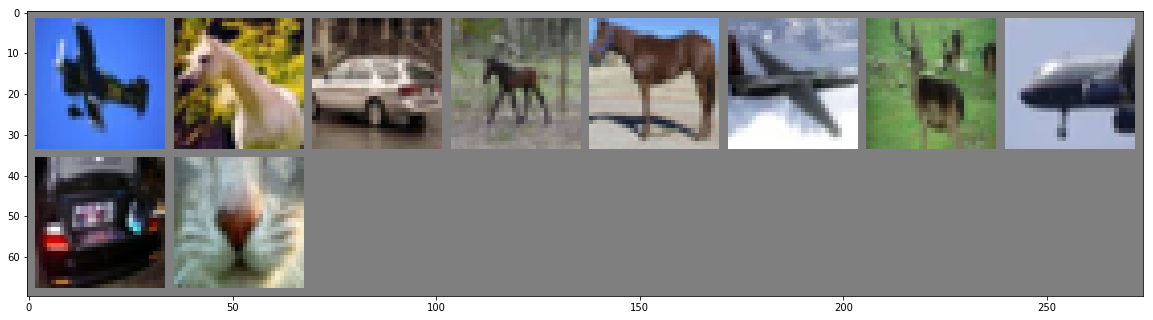

In [26]:
out = net.forward(Variable(images))
val, argmax = torch.max(out, 1)
indexes = argmax.data
def imshow(images):
    fig = plt.figure(figsize = (20, 20))
    images = images / 2 + 0.5
    plt.imshow(np.transpose(images.numpy(), (1, 2, 0)))
imshow(torchvision.utils.make_grid(images))
print([classes[indexes[j]] for j in range(10)])


In [27]:
class_correct = [0 for x in range(10)]
class_total      = [0 for x in range(10)]

for data in test_loader:
    images, labels = data
    outputs = net(Variable(images))
    _, argmax = torch.max(outputs.data, 1)
    correct = (labels == argmax)
    for i in range(10):
        label = labels[i]
        class_correct[label] += correct[i]
        class_total[label] += 1

for i in range(10):
    print(f'{classes[i]} : {class_correct[i] / class_total[i]}')

plane : 0.633
car : 0.781
bird : 0.45
cat : 0.486
deer : 0.568
dog : 0.515
frog : 0.684
horse : 0.759
ship : 0.814
truck : 0.798


In [122]:
class_correct = [0 for x in range(10)]
class_total      = [0 for x in range(10)]

for data in test_loader:
    images, labels = data
    outputs = net(Variable(images))
    _, argmax = torch.max(outputs.data, 1)
    correct = (labels == argmax)
    for i in range(10):
        label = labels[i]
        class_correct[label] += correct[i]
        class_total[label] += 1

for i in range(10):
    print(f'{classes[i]} : {class_correct[i] / class_total[i]}')

plane : 0.434
car : 0.472
bird : 0.293
cat : 0.383
deer : 0.526
dog : 0.516
frog : 0.782
horse : 0.577
ship : 0.743
truck : 0.786
